# C S 363D HW 2

## Feature engineering and linear regression

## Preston Narchetti and Nithin Anumala

For this weeks homework we are going to load in a data set that isn't the "cleanest", repair it, do some analysis on the features, estimate a continuous paramter using linear regression, and experiment with trying a few different methods of feature selection.  Is linear regression _really_ machine learning? Depends on who you ask, but it is definitely an important tool for data mining. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv

## Add in all of your other imports here

## Load in the melb_data_sold_train.csv file here
df = pd.read_csv("melb_data_sold_test.csv")
df.head(20)


,Suburb,Address,Rooms,Type,Price,SellerG,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Avondale Heights,105 Canning St,3,h,848K,Nelson,4/3/17,3034,3,1,2.0,542,NaN,NaN,Moonee Valley,-37.77060,144.86290,Western Metropolitan,4502
1,Pascoe Vale,16/43 Arndt Rd,2,u,541K,Nelson,29/07/2017,3044,2,1,1.0,133,NaN,NaN,Moreland,-37.72136,144.92932,Northern Metropolitan,7485
2,Balwyn North,16 Riverview Rd,3,h,1890K,Fletchers,19/08/2017,3104,3,2,1.0,632,144.0,1940,NaN,-37.79094,145.07899,Southern Metropolitan,7809
3,Altona Meadows,52 Spicer Bvd,4,h,750K,YPA,23/09/2017,3028,4,2,2.0,636,232.0,1996,NaN,-37.87941,144.76935,Western Metropolitan,7630
4,South Yarra,20 Fawkner St,2,h,2430K,Biggin,10/12/16,3141,2,1,2.0,367,NaN,1985,Stonnington,-37.84200,144.98730,Southern Metropolitan,14887
5,Eaglemont,20 Glenard Dr,4,h,2309K,Nelson,28/08/2016,3084,4,3,2.0,1177,291.0,1960,Banyule,-37.76520,145.06870,Eastern Metropolitan,1651
6,Templestowe Lower,4 Michael St,3,h,1370K,Barry,8/4/17,3107,3,1,2.0,743,NaN,NaN,Manningham,-37.77030,145.10860,Eastern Metropolitan,5420
7,Thornbury,171 Mansfield St,3,h,1130K,Jellis,20/05/2017,3071,3,1,1.0,381,NaN,NaN,Darebin,-37.75750,145.01280,Northern Metropolitan,8870
8,Maribyrnong,1 The Esplanade,5,h,1350K,Changing,28/05/2016,3032,5,3,5.0,670,NaN,NaN,Maribyrnong,-37.76760,144.90090,Western Metropolitan,4918
9,Ivanhoe,5/22 Oriel Rd,2,h,790K,Haughton,10/9/16,3079,2,1,1.0,221,NaN,NaN,Banyule,-37.76540,145.03600,Eastern Metropolitan,5549


## Q1 Add a new feature
Toorak is known as one of the pricest suburbs in Melbourne.  Create a new column in your dataframe that is the distance in kilometers from the center of Toorak to the latitude/longitude of that row.  Use the latitude / longitude of (-37.841820, 145.015986) for the center of Toorak.  You may assume the Earth is spherical and has radius of 6371.0088km (the first property in the data frame (-37.68178,144.73779) is approx 30 km away)

In [2]:
def distToToorak(lat, long):
    toorak_lat = -37.841820
    toorak_lon = 145.015986
    
    pi_ratio = np.pi/180
    a_ratio = 0.5 - np.cos((toorak_lat-lat)*pi_ratio)/2 
    a_ratio2 = np.cos(lat*pi_ratio) 
    a_ratio2 *= np.cos(toorak_lat*pi_ratio) 
    a_ratio2 *= (1-np.cos((toorak_lon-long)*pi_ratio))/2
    return ((2*6371.0088) * np.arcsin(np.sqrt(a_ratio + a_ratio2)))

# check for close to 30km, sniff test
print(distToToorak(-37.68178, 144.73779))

30.24477251358006


In [3]:
# Apply function accross frame
df['Distance_To_Toorak'] = distToToorak(df['Lattitude'], df['Longtitude'])

# sniff test
df.head()

,Suburb,Address,Rooms,Type,Price,SellerG,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Distance_To_Toorak
0,Avondale Heights,105 Canning St,3,h,848K,Nelson,4/3/17,3034,3,1,2.0,542,NaN,NaN,Moonee Valley,-37.77060,144.86290,Western Metropolitan,4502,15.607585
1,Pascoe Vale,16/43 Arndt Rd,2,u,541K,Nelson,29/07/2017,3044,2,1,1.0,133,NaN,NaN,Moreland,-37.72136,144.92932,Northern Metropolitan,7485,15.408604
2,Balwyn North,16 Riverview Rd,3,h,1890K,Fletchers,19/08/2017,3104,3,2,1.0,632,144.0,1940,NaN,-37.79094,145.07899,Southern Metropolitan,7809,7.914414
3,Altona Meadows,52 Spicer Bvd,4,h,750K,YPA,23/09/2017,3028,4,2,2.0,636,232.0,1996,NaN,-37.87941,144.76935,Western Metropolitan,7630,22.051728
4,South Yarra,20 Fawkner St,2,h,2430K,Biggin,10/12/16,3141,2,1,2.0,367,NaN,1985,Stonnington,-37.84200,144.98730,Southern Metropolitan,14887,2.519039


## Q2 Fix a column
It looks like the data scraper that crawled this data sometimes captured the price with a 'K' indicating thousand. Correct it.   (935K should become 935000.0, and the column data type should be float64)

In [4]:
# Fixing the Price column
df['Price'] = df['Price'].astype(str).str.replace('K', '000').astype(np.float64)

# sniff test
df[['Price']]

,Price
0,848000.0
1,541000.0
2,1890000.0
3,750000.0
4,2430000.0
...,...
1016,947000.0
1017,1271000.0
1018,834500.0
1019,998000.0


## Q3 Create a one hot encoding for the categorical column 'Type'
Make sure the new columns are merged into the dataframe you are carrying through to the prediction step

In [5]:
# use get_dummies() to create the one-hot sequence.
s_onehot = pd.get_dummies(pd.Series(df['Type']), dtype=np.int64)

# Add the column to the df.
df = df.join(s_onehot)

# sniff test
df.head()

,Suburb,Address,Rooms,Type,Price,SellerG,Date,Postcode,Bedroom2,Bathroom,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Distance_To_Toorak,h,t,u
0,Avondale Heights,105 Canning St,3,h,848000.0,Nelson,4/3/17,3034,3,1,...,NaN,Moonee Valley,-37.77060,144.86290,Western Metropolitan,4502,15.607585,1,0,0
1,Pascoe Vale,16/43 Arndt Rd,2,u,541000.0,Nelson,29/07/2017,3044,2,1,...,NaN,Moreland,-37.72136,144.92932,Northern Metropolitan,7485,15.408604,0,0,1
2,Balwyn North,16 Riverview Rd,3,h,1890000.0,Fletchers,19/08/2017,3104,3,2,...,1940,NaN,-37.79094,145.07899,Southern Metropolitan,7809,7.914414,1,0,0
3,Altona Meadows,52 Spicer Bvd,4,h,750000.0,YPA,23/09/2017,3028,4,2,...,1996,NaN,-37.87941,144.76935,Western Metropolitan,7630,22.051728,1,0,0
4,South Yarra,20 Fawkner St,2,h,2430000.0,Biggin,10/12/16,3141,2,1,...,1985,Stonnington,-37.84200,144.98730,Southern Metropolitan,14887,2.519039,1,0,0


## Q4 Create a box and whisker plot for the Landsize for select suburbs
Show the difference between these three suburbs:
  - Reservoir
  - Richmond
  - Bentleigh East

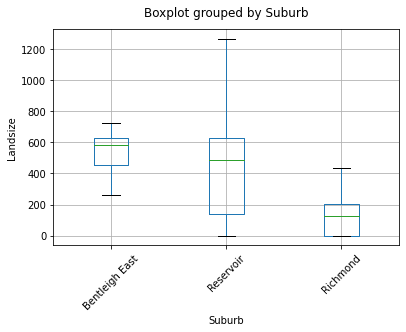

In [6]:
# Get suburb and lansize.
df_sl = df[['Suburb', 'Landsize']]

# get only matching suburbs.
df_box = df[(df['Suburb'] == 'Reservoir') | 
            (df['Suburb'] == 'Richmond') | 
            (df['Suburb'] == 'Bentleigh East')]

# make plot.
df_box.boxplot(column='Landsize', by='Suburb',rot=45, showfliers=False)
plt.title('')
plt.ylabel('Landsize')
plt.show()

## Q5 Calculate the correlations between all of your continuous value predictors
Use the Pearson correlation as discussed in the lectures. 

In [7]:
conval_predictors = df[['Rooms', 'Landsize', 
                        'Distance_To_Toorak', 
                        'Bedroom2', 'Bathroom',
                        'Lattitude', 'Longtitude',
                        'Propertycount', 'BuildingArea', 'Postcode','Price']]

conval_predictors.corr(method='pearson')


,Rooms,Landsize,Distance_To_Toorak,Bedroom2,Bathroom,Lattitude,Longtitude,Propertycount,BuildingArea,Postcode,Price
Rooms,1.000000,0.135500,0.193809,0.934337,0.577145,-0.037822,0.144383,-0.048483,0.221767,0.117381,0.515974
Landsize,0.135500,1.000000,0.049074,0.130119,0.110374,-0.028303,0.028495,0.026311,0.065423,0.024982,0.078142
Distance_To_Toorak,0.193809,0.049074,1.000000,0.198456,0.029440,0.195412,-0.208450,-0.043249,0.015004,0.111630,-0.363939
Bedroom2,0.934337,0.130119,0.198456,1.000000,0.607613,-0.031153,0.129090,-0.063738,0.210838,0.113234,0.491923
Bathroom,0.577145,0.110374,0.029440,0.607613,1.000000,-0.094139,0.128099,-0.050307,0.114097,0.142831,0.482933
Lattitude,-0.037822,-0.028303,0.195412,-0.031153,-0.094139,1.000000,-0.362322,0.033010,-0.003982,-0.424911,-0.234634
Longtitude,0.144383,0.028495,-0.208450,0.129090,0.128099,-0.362322,1.000000,0.051446,0.062387,0.436516,0.187984
Propertycount,-0.048483,0.026311,-0.043249,-0.063738,-0.050307,0.033010,0.051446,1.000000,-0.052367,0.067344,-0.031704
BuildingArea,0.221767,0.065423,0.015004,0.210838,0.114097,-0.003982,0.062387,-0.052367,1.000000,0.030634,0.164140
Postcode,0.117381,0.024982,0.111630,0.113234,0.142831,-0.424911,0.436516,0.067344,0.030634,1.000000,0.095014


## Q5 Create a linear regression model to predict home values
Using the math in ESLII, section 3.2 equation (3.6) calculate $\hat{\beta}$

We are going to create a linear regression model using our numeric predictor columns we selected in the last question, and the home value as are the value you are trying to predict.  You may use numpy to do matrix calculations, but you may not use a built in regression library (for example, you may not use scikt-learn). 

In [8]:
# Grab all numeric data
X_data = df[['Rooms', 'Landsize', 
                        'Distance_To_Toorak', 
                        'Bedroom2', 'Bathroom',
                        'Lattitude', 'Longtitude',
                        'Propertycount', 'Postcode']]

# Insert the column of ones
X_data.insert(0, '', 1)

# Get the y vector
y_data = df[['Price']].to_numpy()

# One-liner to calculate beta_hat
beta_hat = inv(X_data.transpose() @ X_data) @ X_data.transpose() @ y_data

# sniff test
beta_hat

,0
0,2.425583e+07
1,3.200252e+05
2,8.091468e+00
3,-4.204141e+04
4,1.897982e+04
5,1.944658e+05
6,-8.109715e+05
7,-3.825540e+05
8,-1.914564e+00
9,2.778247e+02


## Q6 Apply the linear regression model to the test data and visualize the error
We will cover other methods of evaluating any sort of prediction later, but for this week's exercise I have partitioned the data into two files.  Load the melb_data_sold_test.csv data set and use the matrix you calculated in the last step to predict the housing prices for data in that file.  Create a visualization that shows the error in your predictions (hint:remember to do all your data pre-processing on the new file!).  For the visualization, a histogram of the absolute error vs the total housing prices is sufficient. 

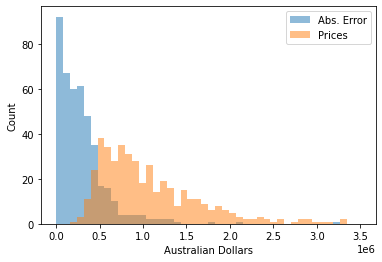

In [9]:
# here you load melb_data_sold_test.csv
test_df = pd.read_csv('melb_data_sold_test.csv')

# Drop any rows that have NaNs.
test_df.dropna(inplace=True)


# calculate the distances for the test set.
test_df['Distance_To_Toorak'] = distToToorak(test_df['Lattitude'], test_df['Longtitude'])

# Fixing the Price column.
test_df['Price'] = test_df['Price'].astype(str).str.replace('K', '000').astype(np.float64)


# Get the test data.
X_test = test_df[['Rooms', 'Landsize', 
                        'Distance_To_Toorak', 
                        'Bedroom2', 'Bathroom',
                        'Lattitude', 'Longtitude',
                        'Propertycount', 'Postcode']].to_numpy()


# Calculate the model's predicted prices.
Y_hat = beta_hat[0].iloc[0] + np.asmatrix(X_test @ beta_hat[1:])

# get the test dataset's Pricing data.
Y_data = test_df[['Price']].to_numpy()


# Calculate the absolute error.
abs_error = np.abs(Y_hat - Y_data)


# Create the plot of error vs Prices.
bins = np.linspace(0, 3.5*10**6, 45)
plt.hist(abs_error, bins, alpha=0.5, label='Abs. Error')
plt.hist(Y_data, bins, alpha=0.5, label='Prices')
plt.legend(loc='upper right')
plt.xlabel("Australian Dollars")
plt.ylabel("Count")
plt.show()




## Q7 Iterate!
We tried one way of creating a feature vector, now try experimenting with something else and see if you can improve your results.  Normalizing data features, creating data features, etc! Have some fun with it. Visualize the improvement you made to your first attempt and give some prose in a markdown cell about different things your tried.

### Our attempt to iterate

Our goal was to determine if the distance between Tarook and a given suburb is a good predictor of house prices. We achieve this by normalizing the distances using the mean and standard deviation of the distances. Then we use the same linear-regression approach used above and show our error vs Prices plot. However we also show a plot displaying the shapes created by the actual prices and our predictions, clearly our model overestimates prices and offers poor variance. We also show the line of best-fit within the scatter plot at the bottom. The outliers in the dataset cause the line to predict higher prices than ground truth.

<ipython-input-10-5551462a68c8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_data['Distance_To_Toorak'] = (X_data-X_data.mean())/X_data.std()
<ipython-input-10-5551462a68c8>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Distance_To_Toorak'] = (X_test-X_test.mean())/X_test.std()


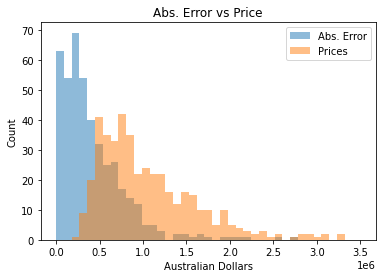

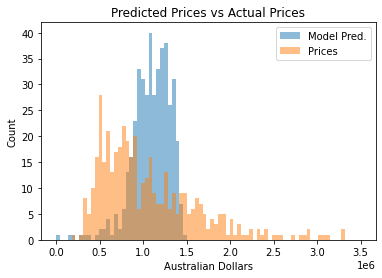

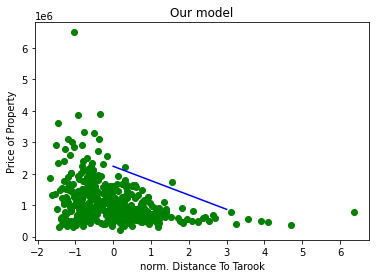

In [10]:
# Grab all numeric data
X_data = df[['Distance_To_Toorak']]

# Normalize using mean normlization
X_data['Distance_To_Toorak'] = (X_data-X_data.mean())/X_data.std()

# Insert the column of ones
X_data.insert(0, '', 1)


# Get the y vector
y_data = df[['Price']].to_numpy()

# One-liner to calculate beta_hat
beta_hat = inv(X_data.transpose() @ X_data) @ X_data.transpose() @ y_data

# sniff test
beta_hat = np.array(beta_hat, dtype=float)


# ########### Test Model ############


# here you load melb_data_sold_test.csv
test_df = pd.read_csv('melb_data_sold_test.csv')

# Drop any rows that have NaNs.
test_df.dropna(inplace=True)

# calculate the distances for the test set.
test_df['Distance_To_Toorak'] = distToToorak(test_df['Lattitude'], test_df['Longtitude'])

# Fixing the Price column.
test_df['Price'] = test_df['Price'].astype(str).str.replace('K', '000').astype(np.float64)

# Get the test data.
X_test = test_df[['Distance_To_Toorak']]

# Normalize using mean normlization
X_test['Distance_To_Toorak'] = (X_test-X_test.mean())/X_test.std()

# Calculate the model's predicted prices.
Y_hat = beta_hat[0] + np.asmatrix(X_test.to_numpy() @ beta_hat[1:])

# get the test dataset's Pricing data.
Y_data = test_df[['Price']].to_numpy()

# Calculate the absolute error.
abs_error = np.abs(Y_hat - Y_data)


# Create the plot of error vs Prices.
bins = np.linspace(0, 3.5*10**6, 40)
plt.hist(abs_error, bins, alpha=0.5, label='Abs. Error')
plt.hist(Y_data, bins, alpha=0.5, label='Prices')
plt.legend(loc='upper right')
plt.xlabel("Australian Dollars")
plt.ylabel("Count")
plt.title("Abs. Error vs Price")
plt.show()

# Compare distributions
bins = np.linspace(0, 3.5*10**6, 80)
plt.hist(Y_hat, bins, alpha=0.5, label='Model Pred.')
plt.hist(Y_data, bins, alpha=0.5, label='Prices')
plt.legend(loc='upper right')
plt.xlabel("Australian Dollars")
plt.ylabel("Count")
plt.title("Predicted Prices vs Actual Prices")
plt.show()

# Create scatter plot
plt.scatter(X_test['Distance_To_Toorak'], Y_data, c='green')
x = np.linspace(-5, 1, 4)
plt.plot(beta_hat[0] + x*beta_hat[1], color='blue')
plt.xlabel("norm. Distance To Tarook")
plt.ylabel("Price of Property")
plt.title("Our model")
plt.show()
